## Athlete Dataset Using Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ath = pd.read_csv('athlete_events.csv')

In [3]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


------------------------------------------------------------------
1.Which season is most popular?
------------------------------------------------------------------

In [7]:
ath.Season.unique()

array(['Summer', 'Winter'], dtype=object)

In [8]:
s = ath.groupby(['Season']).size()
s = pd.DataFrame(s)
s = s.reset_index()
s = s.rename(columns={0:'Count'})
s

,Season,Count
0,Summer,222552
1,Winter,48564


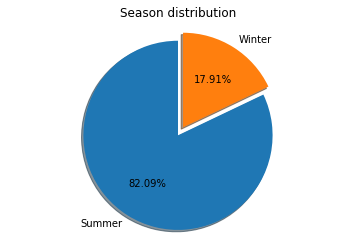

In [17]:
plt.pie(s['Count'],shadow=True,explode = (0, 0.1),labels=s['Season'],autopct='%1.2f%%',startangle=90)
plt.title('Season distribution')
plt.axis('equal')
plt.show()

Almost 82% of games were hosted in the summer season

------------------------------------------------------------------
2.Which are the cities which have hosted olympics? Which city has hosted maximum number of olympic?
------------------------------------------------------------------

In [22]:
ath.City.unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [199]:
c=ath.groupby(['Games','City']).size().groupby(['City']).size()
c = pd.DataFrame(c)
c = c.reset_index()
c = c.rename(columns={0:'Count'})
c=c.sort_values(by='Count',ascending = False).head(10)
c

,City,Count
3,Athina,3
17,London,3
30,Sankt Moritz,2
26,Paris,2
37,Stockholm,2
18,Los Angeles,2
15,Lake Placid,2
14,Innsbruck,2
0,Albertville,1
27,Rio de Janeiro,1


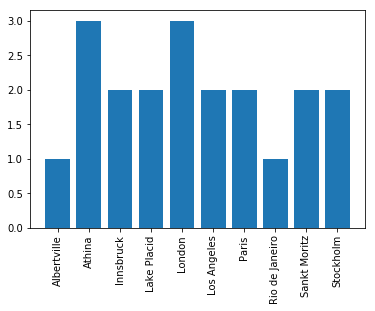

In [200]:
plt.bar(c['City'],c['Count'])
plt.xticks(rotation='vertical')
plt.show()

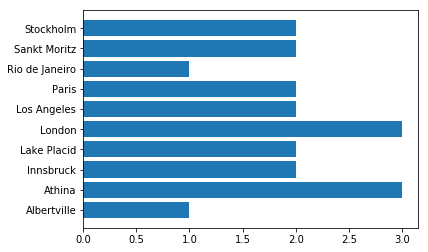

In [201]:
plt.barh(c.City,c.Count)
plt.show()

Athina and London hosted maximum number of Olympic 3 times.

------------------------------------------------------------------
3.Top 10 teams having played maximum number of athelete?
------------------------------------------------------------------

In [105]:
a1=ath.groupby(['Team','Name']).size()
a1=a1.groupby(['Team']).size()
a1 = pd.DataFrame(a1)
a1 = a1.reset_index()
a1 = a1.rename(columns={0:'Count'})
a1=a1.sort_values(by='Count',ascending = False)
a1=a1.head(10)
a1

,Team,Count
1095,United States,9114
361,France,5777
412,Great Britain,5758
506,Italy,4688
398,Germany,4569
173,Canada,4546
513,Japan,3981
65,Australia,3766
1010,Sweden,3613
809,Poland,2932


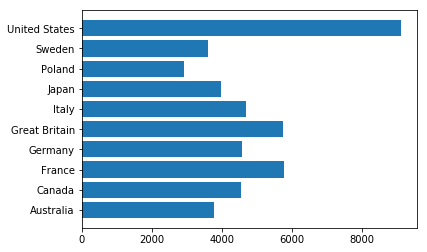

In [108]:
plt.barh(a1.Team,a1.Count)
plt.show()

------------------------------------------------------------------
4.Top 10 teams having played maximum average height of atheletes?
------------------------------------------------------------------

In [139]:
mah=ath.groupby(['Team','Name','Height']).size()
mah = pd.DataFrame(mah)
mah = mah.reset_index()
mah=mah.groupby(['Team']).agg({'Height':np.mean}).sort_values(by='Height',ascending=False).head(10)
mah = mah.reset_index()
mah

,Team,Height
0,Puerto Rico-1,196.000000
1,England-1,193.000000
2,France/Great Britain,191.000000
3,Nadine,190.000000
4,Serbia-2,189.000000
5,Sydney Rowing Club,188.500000
6,Serbia and Montenegro,188.416667
7,Brazil-2,188.263158
8,New York Athletic Club-4,188.000000
9,Puerto Rico-2,188.000000


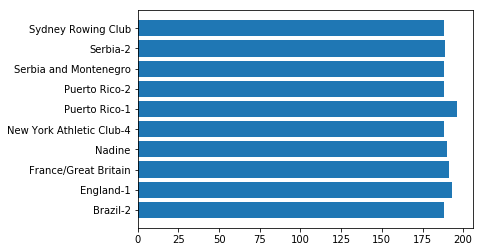

In [143]:
plt.barh(mah.Team,mah.Height)
plt.show()

Puerto-Rico-1 team is having highest avearge athelete height

------------------------------------------------------------------
5.Top 10 teams having played maximum average weight of atheletes?
------------------------------------------------------------------

In [148]:
maw=ath.groupby(['Team','Name','Weight']).size()
maw = pd.DataFrame(maw)
maw = maw.reset_index()
maw=maw.groupby(['Team']).agg({'Weight':np.mean}).sort_values(by='Weight',ascending=False).head(10)
maw = maw.reset_index()
maw

,Team,Weight
0,Kathleen,104.500
1,Maryke,99.500
2,London City Police-1,99.250
3,Puerto Rico-2,98.000
4,Puerto Rico-1,96.000
5,Liverpool Police Team-2,95.375
6,Mexico-2,95.000
7,Libellule de Paris,95.000
8,Monaco-1,94.000
9,Ireland-1,94.000


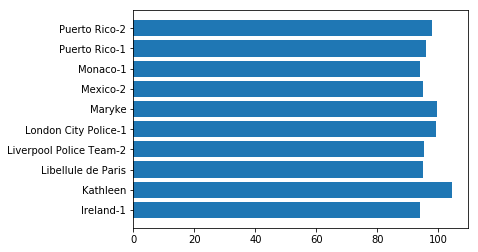

In [151]:
plt.barh(maw.Team,maw.Weight)
plt.show()

------------------------------------------------------------------
6.Top 10 sports that have had maximum participation?
------------------------------------------------------------------

In [156]:
t10s = ath.groupby(['Sport']).size()
t10s = pd.DataFrame(t10s)
t10s = t10s.reset_index()
t10s = t10s.rename(columns={0:'Count'})
t10s = t10s.sort_values(by='Count',ascending=False).head(10)
t10s

,Sport,Count
5,Athletics,38624
27,Gymnastics,26707
54,Swimming,23195
47,Shooting,11448
19,Cycling,10859
22,Fencing,10735
43,Rowing,10595
17,Cross Country Skiing,9133
1,Alpine Skiing,8829
65,Wrestling,7154


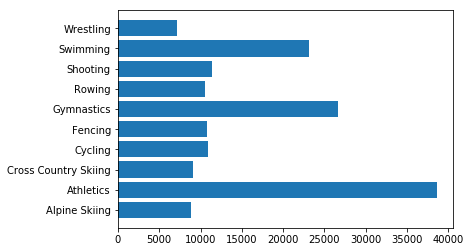

In [158]:
plt.barh(t10s.Sport,t10s.Count)
plt.show()

------------------------------------------------------------------
7.Top 10 countries that have had maximum gold?
------------------------------------------------------------------

In [168]:
t10g = ath[['Team']][ath.Medal=='Gold'].groupby(['Team']).size()
t10g = pd.DataFrame(t10g)
t10g = t10g.reset_index()
t10g = t10g.rename(columns={0:'Count'})
t10g = t10g.sort_values(by='Count',ascending=False).head(10)
t10g

,Team,Count
224,United States,2474
200,Soviet Union,1058
87,Germany,679
112,Italy,535
90,Great Britain,519
80,France,455
205,Sweden,451
102,Hungary,432
35,Canada,422
62,East Germany,369


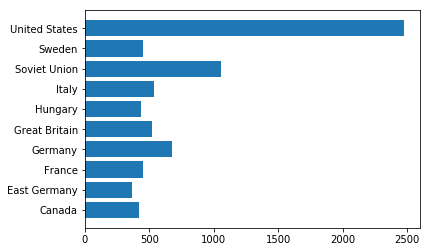

In [170]:
plt.barh(t10g.Team,t10g.Count)
plt.show()

------------------------------------------------------------------
8.Top 10 countries that have had maximum silver? Do you see any difference in the countries with gold and silver?
------------------------------------------------------------------

In [173]:
t10s = ath[['Team']][ath.Medal=='Silver'].groupby(['Team']).size()
t10s = pd.DataFrame(t10s)
t10s = t10s.reset_index()
t10s = t10s.rename(columns={0:'Count'})
t10s = t10s.sort_values(by='Count',ascending=False).head(10)
t10s

,Team,Count
255,United States,1512
213,Soviet Union,716
83,Germany,627
89,Great Britain,582
76,France,518
114,Italy,508
225,Sweden,476
6,Australia,453
29,Canada,413
189,Russia,351


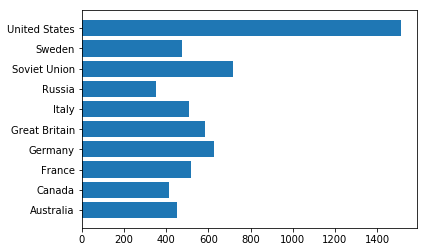

In [175]:
plt.barh(t10s.Team,t10s.Count)
plt.show()

------------------------------------------------------------------
9.Which medal is earned the most in India? What is the percentage ?
------------------------------------------------------------------

In [184]:
mm = ath[['Medal']][ath.Team == 'India'].groupby(['Medal']).size()
mm = pd.DataFrame(mm)
mm = mm.reset_index()
mm = mm.rename(columns={0:'Count'})
mm

,Medal,Count
0,Bronze,40
1,Gold,138
2,Silver,19


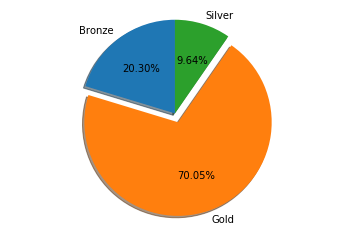

In [187]:
plt.pie(mm['Count'],shadow=True,explode = (0, 0.1, 0),labels=mm['Medal'],autopct='%1.2f%%',startangle=90)
plt.axis('equal')
plt.show()

In [4]:
india = ath[ath['Team']=='India']
india = india.loc[:,['Sex','Height','Weight','Age']]

In [5]:
india.shape

(1400, 4)

Parallel Coordinate Plots
---------

In [6]:
from pandas.plotting import parallel_coordinates

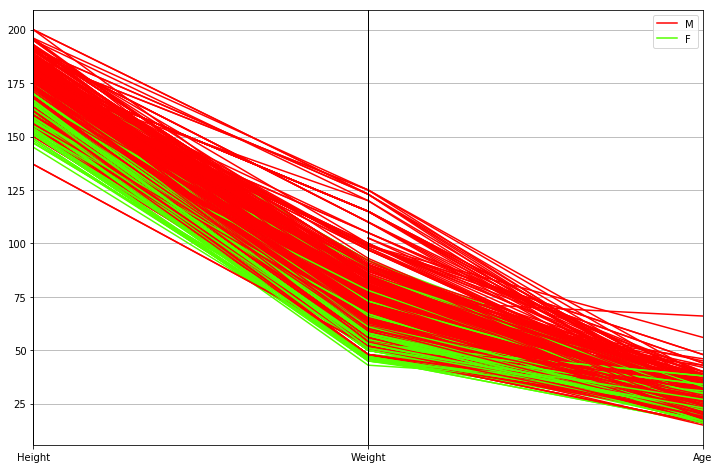

In [14]:
fig = plt.figure(figsize=(12,8))
parallel_coordinates(india,'Sex',colormap=plt.get_cmap('prism'))
plt.show()